In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Thresholding

<function matplotlib.pyplot.show(*args, **kw)>

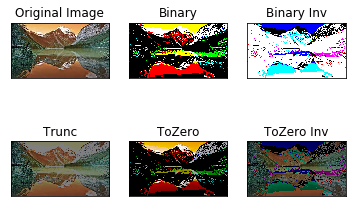

In [4]:
img=cv2.imread('download.jpg')
#img=cv2.imread('C:/Users/guruc/Documents/AIML/dataset/gradient.jpg')
ret,thresh1=cv2.threshold(img,122,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles=['Original Image','Binary','Binary Inv','Trunc','ToZero','ToZero Inv']
images=[img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show

# Morphological transformation

## Erode

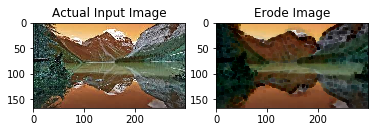

In [5]:
img=cv2.imread('download.jpg')
kernel=np.ones((5,5),np.uint8)
erosion=cv2.erode(img,kernel,iterations=1)

plt.subplot(121),plt.imshow(img),plt.title('Actual Input Image')
plt.subplot(122),plt.imshow(erosion),plt.title('Erode Image')

plt.show()

## Dilations

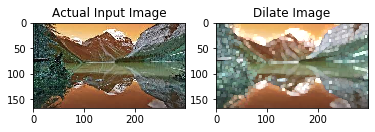

In [6]:
img=cv2.imread('download.jpg')
kernel=np.ones((5,5),np.uint8)
dilation=cv2.dilate(img,kernel,iterations=1)

plt.subplot(121),plt.imshow(img),plt.title('Actual Input Image')
plt.subplot(122),plt.imshow(dilation),plt.title('Dilate Image')

plt.show()

## Opening

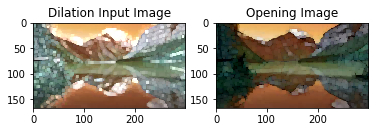

In [7]:
img=cv2.imread('download.jpg')
kernel=np.ones((5,5),np.uint8)
opening=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

plt.subplot(121),plt.imshow(dilation),plt.title('Dilation Input Image')
plt.subplot(122),plt.imshow(opening),plt.title('Opening Image')

plt.show()

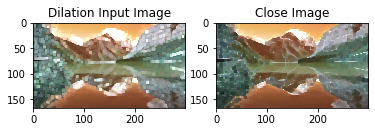

In [8]:
img=cv2.imread('download.jpg')
kernel=np.ones((5,5),np.uint8)
close=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

plt.subplot(121),plt.imshow(dilation),plt.title('Dilation Input Image')
plt.subplot(122),plt.imshow(close),plt.title('Close Image')

plt.show()

## Morphological Gradient

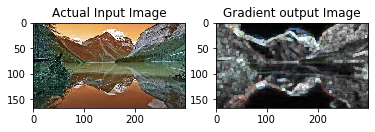

In [9]:
img=cv2.imread('download.jpg')
kernel=np.ones((5,5),np.uint8)
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Actual Input Image')
plt.subplot(122),plt.imshow(gradient),plt.title('Gradient output Image')

plt.show()

## Image Gradients

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

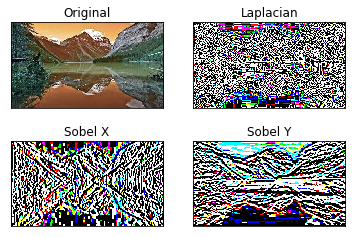

In [10]:
img=cv2.imread('download.jpg')

laplacian=cv2.Laplacian(img,cv2.CV_64F)
sobe1x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobe1y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobe1x,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobe1y,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])

## Canny Edge Detection

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

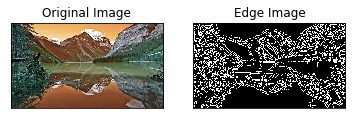

In [11]:
img=cv2.imread('download.jpg')
edges=cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Original Image'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap='gray')
plt.title('Edge Image'),plt.xticks([]),plt.yticks([])

## Contour 

In [14]:
img=cv2.imread('download.jpg')
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img_gray,127,255,0)

contours,hierarchy=cv2.findContours(thresh,2,1)
cnt=contours[0]

hull= cv2.convexHull(cnt,returnPoints=False)
defects= cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d=defects[i,0]
    start=tuple(cnt[s][0])
    end=tuple(cnt[e][0])
    far=tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)
    
cv2.imshow('CONTOUR_Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

None


AttributeError: 'NoneType' object has no attribute 'shape'

# Video Handling

In [ ]:
import numpy as np
import cv2

cap=cv2.VideoCapture('D:/Movies/Padmavathi.mkv')

while(True):
    ret,frame=cap.read()
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame',gray)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()